In [84]:
import pandas as pd

In [85]:
diabetes = pd.read_csv('pima-indians-diabetes.csv', )

In [86]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [87]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [88]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [89]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min() ))

In [90]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [91]:
import tensorflow as tf

In [92]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [93]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [94]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [95]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size= 10)

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

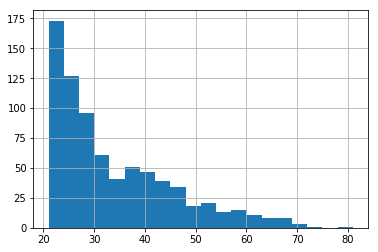

In [97]:
diabetes['Age'].hist(bins=20)

In [98]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [99]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [100]:
x_data = diabetes.drop('Class', axis=1)

In [106]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [109]:
labels = diabetes['Class']

In [102]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [103]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3,random_state=101)

## Tensorflow implementation

In [111]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [112]:
model =  tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mojiway\\AppData\\Local\\Temp\\tmpcb462a60', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [113]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\mojiway\AppData\Local\Temp\tmpcb462a60\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 451.652
INFO:tensorflow:loss = 6.3651333, step = 101 (0.228 sec)
INFO:tensorflow:global_step/sec: 468.545
INFO:tensorflow:loss = 5.158932, step = 201 (0.213 sec)
INFO:tensorflow:global_step/sec: 470.687
INFO:tensorflow:loss = 4.9089518, step = 301 (0.210 sec)
INFO:tensorflow:global_step/sec: 417.125
INFO:tensorflow:loss = 5.861109, step = 401 (0.239 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 3.9563446, step = 501 (0.201 sec)
INFO:tensorflow:global_step/sec: 451.587
INFO:tensorflow:loss = 4.8709545, step = 601 (0.221 sec)
INFO:tensorflow:global_step/sec: 466.431
INFO:tensorflow:loss = 5.488325, step = 701 (0.217 sec)
INFO:tensorflow:global_step/sec: 396.138
INFO:tensorflow:loss = 4.835493, step = 801 (0.247 sec)
INFO:tensorflow:global_step/

In [114]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [115]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-03-13-06:24:05
INFO:tensorflow:Restoring parameters from C:\Users\mojiway\AppData\Local\Temp\tmpcb462a60\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-03-13-06:24:06
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.806749, auc_precision_recall = 0.6501037, average_loss = 0.5238164, global_step = 1000, label/mean = 0.35064936, loss = 5.041733, prediction/mean = 0.3740931


In [116]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.806749,
 'auc_precision_recall': 0.6501037,
 'average_loss': 0.5238164,
 'label/mean': 0.35064936,
 'loss': 5.041733,
 'prediction/mean': 0.3740931,
 'global_step': 1000}

In [117]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size=10, num_epochs=1, shuffle=False)

In [120]:
predictions = model.predict(pred_input_func)

In [121]:
my_pred =  list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\mojiway\AppData\Local\Temp\tmpcb462a60\model.ckpt-1000


In [122]:
my_pred

[{'logits': array([0.1093623], dtype=float32),
  'logistic': array([0.52731335], dtype=float32),
  'probabilities': array([0.47268662, 0.52731335], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.61290807], dtype=float32),
  'logistic': array([0.64860386], dtype=float32),
  'probabilities': array([0.3513961 , 0.64860386], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.57048947], dtype=float32),
  'logistic': array([0.36112392], dtype=float32),
  'probabilities': array([0.6388761, 0.3611239], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5405723], dtype=float32),
  'logistic': array([0.36805448], dtype=float32),
  'probabilities': array([0.63194555, 0.36805448], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits'

### PREDICTION USING DENSE NEURAL NETWORKS:

In [124]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mojiway\\AppData\\Local\\Temp\\tmpfos_00mo', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [125]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [126]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [127]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=5000, shuffle=True)

In [128]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns= feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mojiway\\AppData\\Local\\Temp\\tmp2ls177jz', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [129]:
dnn_model.train(input_fn = input_func, steps=4000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\mojiway\AppData\Local\Temp\tmp2ls177jz\model.ckpt.
INFO:tensorflow:loss = 8.738885, step = 1
INFO:tensorflow:global_step/sec: 374.166
INFO:tensorflow:loss = 4.945213, step = 101 (0.269 sec)
INFO:tensorflow:global_step/sec: 441.707
INFO:tensorflow:loss = 3.6135466, step = 201 (0.228 sec)
INFO:tensorflow:global_step/sec: 280.077
INFO:tensorflow:loss = 4.1632986, step = 301 (0.376 sec)
INFO:tensorflow:global_step/sec: 331.449
INFO:tensorflow:loss = 6.3344417, step = 401 (0.283 sec)
INFO:tensorflow:global_step/sec: 432.187
INFO:tensorflow:loss = 2.3304462, step = 501 (0.232 sec)
INFO:tensorflow:global_step/sec: 445.634
INFO:tensorflow:loss = 3.4203227, step = 601 (0.225 sec)
INFO:tensorflow:global_step/sec: 412.62
INFO:tensorflow:loss = 4.865583, step = 701 (0.244 sec)
INFO:tensorflow:global_step/sec: 433.088
INFO:tensorflow:loss = 6.7773495, step = 801 (0.229 sec)
INFO:tensorflow:global_step

In [130]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [131]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-03-13-06:42:11
INFO:tensorflow:Restoring parameters from C:\Users\mojiway\AppData\Local\Temp\tmp2ls177jz\model.ckpt-4000
INFO:tensorflow:Finished evaluation at 2019-03-13-06:42:12
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8054321, auc_precision_recall = 0.6913222, average_loss = 0.54063654, global_step = 4000, label/mean = 0.35064936, loss = 5.2036266, prediction/mean = 0.38957363


{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8054321,
 'auc_precision_recall': 0.6913222,
 'average_loss': 0.54063654,
 'label/mean': 0.35064936,
 'loss': 5.2036266,
 'prediction/mean': 0.38957363,
 'global_step': 4000}